In [1]:
import pandas as pd
import numpy as np

In [50]:
segments = pd.read_csv("../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/merged_segements_1000M.csv")
gps_data = pd.read_csv("../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/merged_gps_data_1000M.csv")

In [51]:
merged = pd.merge(segments,gps_data, on="segment_id", how='inner')
needed = merged[['road_section_id','speed']]
df = needed.groupby('road_section_id').mean()
df.rename(columns={"speed":"speed_mean"}, inplace=True)
df['speed_std'] = needed.groupby('road_section_id').std()['speed']
segments['no_data_points'] = merged.groupby('segment_id').count()['id']

In [ ]:
segments.reset_index(drop=True)

In [ ]:
for id in segments['segment_id']:
    print(len(gps_data[gps_data['segment_id']==id]))

In [79]:
gps_data[gps_data['segment_id']==348]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,trip_id,elevation,segment_id


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

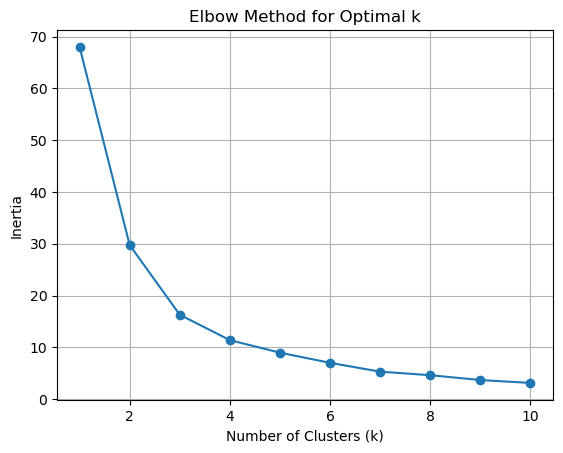

In [9]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_method(result,clustering_features):
  # eg :- clustering_features = ['speed_mean', 'speed_variance']
  X = result[clustering_features]

  # Standardize the data (important for K-Means)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Initialize lists to store inertia values for different k
  inertia_values = []

  # Determine a range of k values to test (e.g., from 1 to 10 clusters)
  k_values = range(1, 11)

  # Calculate inertia for each k value
  for k in k_values:
      kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
      kmeans.fit(X_scaled)
      inertia_values.append(kmeans.inertia_)

  # Plot the elbow graph
  plt.plot(k_values, inertia_values, marker='o', linestyle='-')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.grid(True)
  plt.show()

elbow_method(df, ['speed_mean', 'speed_std'])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[['speed_mean', 'speed_std']])

In [11]:
# Perform K-Means clustering
k = 3  # You can choose the number of clusters (k) as needed
kmeans = KMeans(n_init=10,n_clusters=k, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_features)


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
norms = df.groupby("cluster").mean()

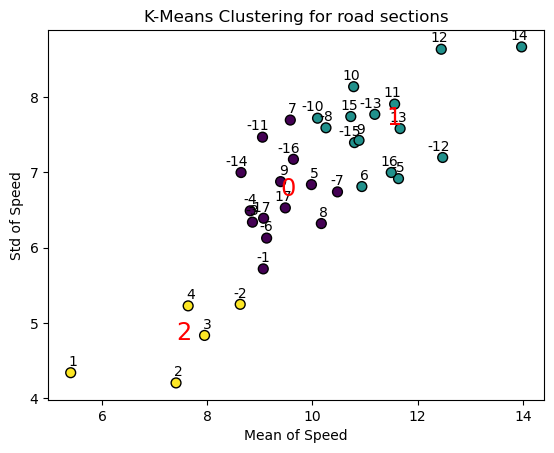

In [43]:
# Plot the clusters in the reduced space
plt.scatter(df['speed_mean'], df['speed_std'], c=df['cluster'], cmap='viridis', marker='o', s=50, edgecolors='k')
    
# Add labels near data points
for i, label in enumerate(df.index.to_list()):
    plt.annotate(label, (df['speed_mean'][label], df['speed_std'][label]), textcoords="offset points", xytext=(5,5), ha='right')

for i in range(len(norms)):
    plt.text(norms.loc[i]['speed_mean'],norms.loc[i]['speed_std'], i, color="red", fontsize='xx-large')

plt.title('K-Means Clustering for road sections')
plt.xlabel('Mean of Speed')
plt.ylabel('Std of Speed')
plt.show()

In [44]:
norms

,speed_mean,speed_std
cluster,,
0,9.382448,6.693555
1,11.395713,7.634967
2,7.404558,4.768115
